In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from datetime import datetime
from math import pi
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

ModuleNotFoundError: No module named 'bokeh'

In [2]:
period = 'M30'
modpath = os.path.dirname('C:\\TickDownloader\\tickdata\\')
datapath = os.path.join(modpath, 'EURUSD_{}_UTC-5_00.csv'
                                .format(period))
data = pd.read_csv(datapath,
                                parse_dates=False,
                                header=None)
data.columns = ['date','time','open','high','low','close','volume']

data['date'] = pd.to_datetime(data['date']+' '+data['time'])
data = data[data.date<datetime(2017,1,1)]

In [3]:
data.head()

,date,time,open,high,low,close,volume
0,2003-05-04 20:00:00,20:00,1.12161,1.12258,1.12154,1.12218,27171
1,2003-05-04 20:30:00,20:30,1.12207,1.12314,1.12198,1.12258,25319
2,2003-05-04 21:00:00,21:00,1.12232,1.12262,1.12153,1.12180,26251
3,2003-05-04 21:30:00,21:30,1.12170,1.12209,1.12099,1.12140,26603
4,2003-05-04 22:00:00,22:00,1.12141,1.12211,1.12116,1.12190,26052


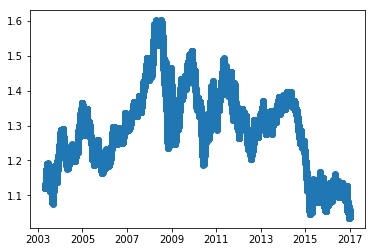

In [4]:
plt.plot_date(data.date,data.close)

In [5]:
year = 2016
month = 5
df = data[(data.date>datetime(year,month,1))&
         (data.date<datetime(year,month,31))]

inc = df.close > df.open
dec = df.open > df.close
w = 0.5*60*60*1000 # half day in ms

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=500, plot_height=200)
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(df.date, df.high, df.date, df.low, color="black")
p.vbar(df.date[inc], w, df.open[inc], df.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(df.date[dec], w, df.open[dec], df.close[dec], fill_color="#F2583E", line_color="black")

show(p)

In [6]:
data['pivot'] = (data.high + data.low +data.close)/3
data.head()

,date,time,open,high,low,close,volume,pivot
0,2003-05-04 20:00:00,20:00,1.12161,1.12258,1.12154,1.12218,27171,1.122100
1,2003-05-04 20:30:00,20:30,1.12207,1.12314,1.12198,1.12258,25319,1.122567
2,2003-05-04 21:00:00,21:00,1.12232,1.12262,1.12153,1.12180,26251,1.121983
3,2003-05-04 21:30:00,21:30,1.12170,1.12209,1.12099,1.12140,26603,1.121493
4,2003-05-04 22:00:00,22:00,1.12141,1.12211,1.12116,1.12190,26052,1.121723


In [7]:
data['sma'] = data['pivot'].rolling(200).mean()
data.tail()

,date,time,open,high,low,close,volume,pivot,sma
170793,2016-12-30 14:30:00,14:30,1.05251,1.05360,1.05245,1.05343,7578,1.053160,1.046724
170794,2016-12-30 15:00:00,15:00,1.05347,1.05348,1.05279,1.05299,5746,1.053087,1.046766
170795,2016-12-30 15:30:00,15:30,1.05299,1.05376,1.05238,1.05247,5440,1.052870,1.046805
170796,2016-12-30 16:00:00,16:00,1.05244,1.05251,1.05141,1.05191,3040,1.051943,1.046840
170797,2016-12-30 16:30:00,16:30,1.05191,1.05303,1.05123,1.05150,3227,1.051920,1.046874


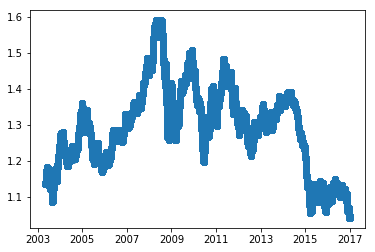

In [8]:
plt.plot_date(data.date,data.sma)

In [9]:
data.shape

(170798, 9)

In [10]:
import numpy as np

from bokeh.io import show
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure

source = ColumnDataSource(data=dict(date=data.date, close=data.close))

p = figure(plot_height=300, plot_width=600, tools=TOOLS,
           x_axis_type="datetime", x_axis_location="above",
           background_fill_color="#efefef", x_range=(data.date[500], data.date[5000]))

p.line('date', 'close', source=source)
p.yaxis.axis_label = 'Price'

select = figure(title="Drag the middle and edges of the selection box to change the range above",
                plot_height=130, plot_width=600, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                tools="", toolbar_location=None, background_fill_color="#efefef")

range_rool = RangeTool(x_range=p.x_range)
range_rool.overlay.fill_color = "navy"
range_rool.overlay.fill_alpha = 0.2

select.line('date', 'close', source=source)
select.ygrid.grid_line_color = None
select.add_tools(range_rool)
select.toolbar.active_multi = range_rool

show(column(p, select))

In [27]:
data['return_1'] = data['pivot'].pct_change(periods=1)
data.head()

,date,time,open,high,low,close,volume,pivot,sma,return_1
0,2003-05-04 20:00:00,20:00,1.12161,1.12258,1.12154,1.12218,27171,1.122100,NaN,NaN
1,2003-05-04 20:30:00,20:30,1.12207,1.12314,1.12198,1.12258,25319,1.122567,NaN,0.000416
2,2003-05-04 21:00:00,21:00,1.12232,1.12262,1.12153,1.12180,26251,1.121983,NaN,-0.000520
3,2003-05-04 21:30:00,21:30,1.12170,1.12209,1.12099,1.12140,26603,1.121493,NaN,-0.000437
4,2003-05-04 22:00:00,22:00,1.12141,1.12211,1.12116,1.12190,26052,1.121723,NaN,0.000205


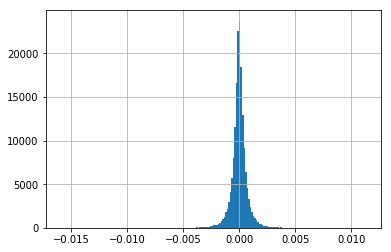

In [28]:
data['return_1'].hist(bins=200)

In [29]:
data['return_1'].mean()

-1.1569229317368455e-07

In [30]:
from scipy.stats import kurtosis
kurtosis(data[500:]['return_1'])

15.635371773066684